In [1]:
import requests
from io import BytesIO
from PIL import Image
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import pymysql
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# 영화 포스터를 가져와 주피터에서 볼 수 있도록 만들어주는 메소드
def display_posters(movieId_list):
    def get_poster(movieId):
        url = f"https://pai-datasets.s3.ap-northeast-2.amazonaws.com/recommender_systems/movielens/img/POSTER_20M_FULL/{movieId}.jpg"
        try:
            response = requests.get(url)
            b = BytesIO(response.content)
            img = np.asarray(Image.open(b))
        except:
            img = np.zeros((200,100,3))
        return img
    
    images = []
    for i in movieId_list:
        img = get_poster(i)
        images.append(img)

    columns = 5
    rows = (len(movieId_list) - 1) // columns + 1
    fig, axes = plt.subplots(rows, columns)
    axes = axes.flatten()
    fig.set_size_inches((20,rows * 5))
        
    for ind, img in enumerate(images):
        c_id = ind % columns
        r_id = ind // columns
        ax = axes[r_id*columns + c_id]
        ax.set_title(movieId_list[ind])
        ax.imshow(img)

    plt.tight_layout()

In [3]:
movies_df = pd.read_csv("D:/추천 시스템/movies.csv", index_col=0)
genres_df = pd.read_csv("D:/추천 시스템/genres.csv", index_col=0)
ratings_df = pd.read_csv("D:/추천 시스템/ratings.csv", index_col=0)

C:\Users\5CG7092POZ\Anaconda3\envs\tf2.0\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
cnt_genre = genres_df.groupby("movie_id", as_index=False).count()

In [5]:
cnt_genre

,movie_id,genre
0,1,5
1,2,3
2,3,2
3,4,3
4,5,1
...,...,...
27273,131254,1
27274,131256,1
27275,131258,1
27276,131260,1


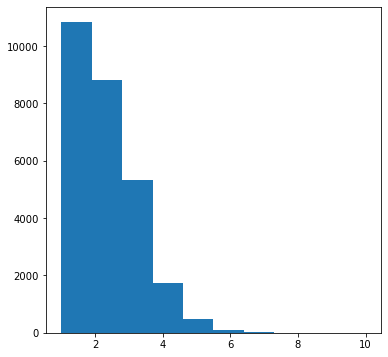

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.hist(cnt_genre["genre"])

fig.savefig("hist.png")

In [7]:
ratings_df["rated_at"] = pd.to_datetime(ratings_df["rated_at"], unit="s")

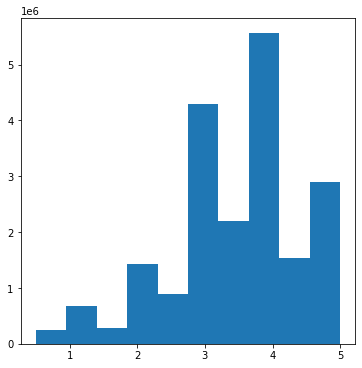

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.hist(ratings_df["rating"])

fig.savefig("hist.png")

In [10]:
gby_cnt = ratings_df.groupby("movie_id").count()
cnt_over300 = ratings_df[ratings_df["movie_id"].isin(gby_cnt[gby_cnt["rating"]>=300].index)]
cnt_over300.groupby("movie_id").mean().sort_values("rating", ascending=False)

top10 = cnt_over300.groupby("movie_id").mean().sort_values("rating", ascending=False).nlargest(10, ["rating"], keep="all")

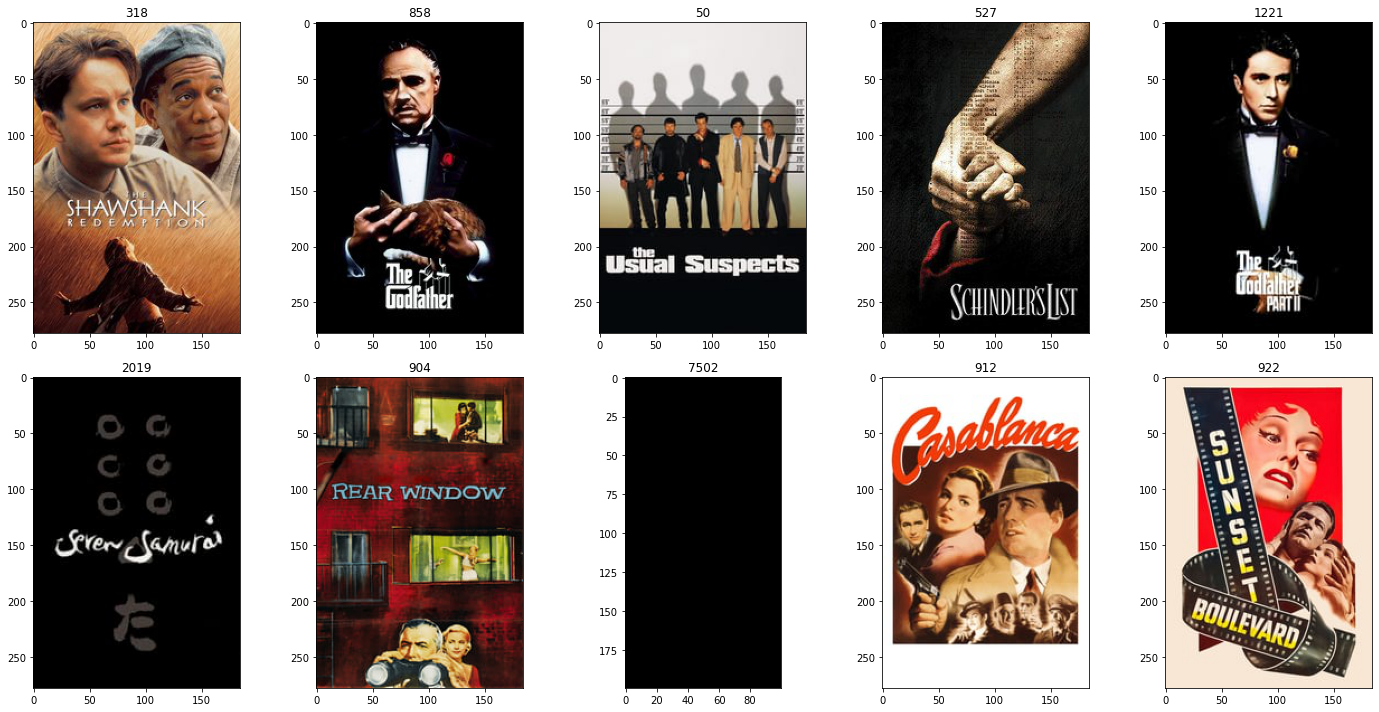

In [11]:
display_posters(top10.index)

In [12]:
horrors = set(genres_df[genres_df["genre"]=="Horror"]["movie_id"])
horror_ratings = ratings_df[ratings_df["movie_id"].isin(horrors)]
gby_cnt = horror_ratings.groupby("movie_id").count()
cnt_over300 = horror_ratings[horror_ratings["movie_id"].isin(gby_cnt[gby_cnt["rating"]>=300].index)]
cnt_over300.groupby("movie_id").mean().sort_values("rating", ascending=False)

top10_horror = cnt_over300.groupby("movie_id").mean().sort_values("rating", ascending=False).nlargest(10, ["rating"], keep="all")

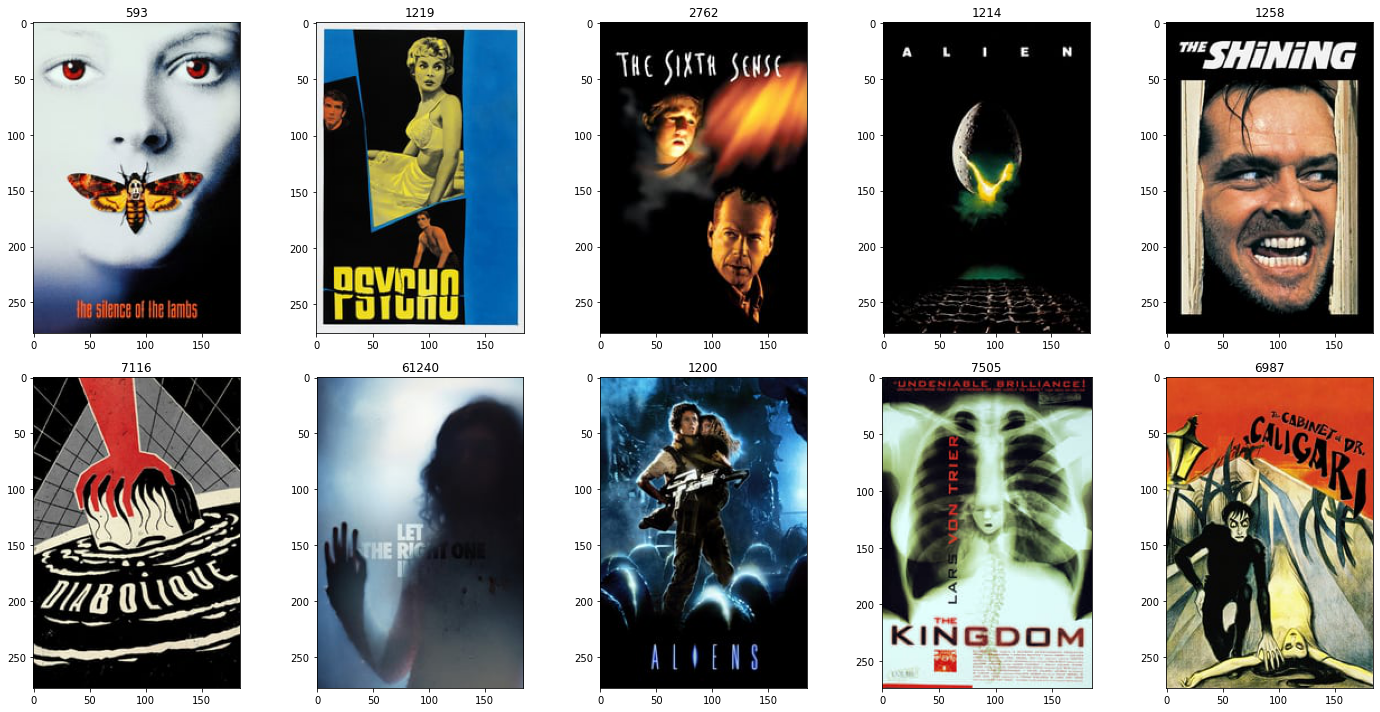

In [13]:
display_posters(top10_horror.index)

In [14]:
recent_yr = movies_df["release_year"].max()
recent_movies = movies_df[movies_df["release_year"].isin([recent_yr, recent_yr-1, recent_yr-2])]["id"].values
recent_ratings = ratings_df[ratings_df["movie_id"].isin(recent_movies)]
recent_top10 = recent_ratings.groupby(by=["movie_id"]).mean().sort_values("rating", ascending=False).head(10).index

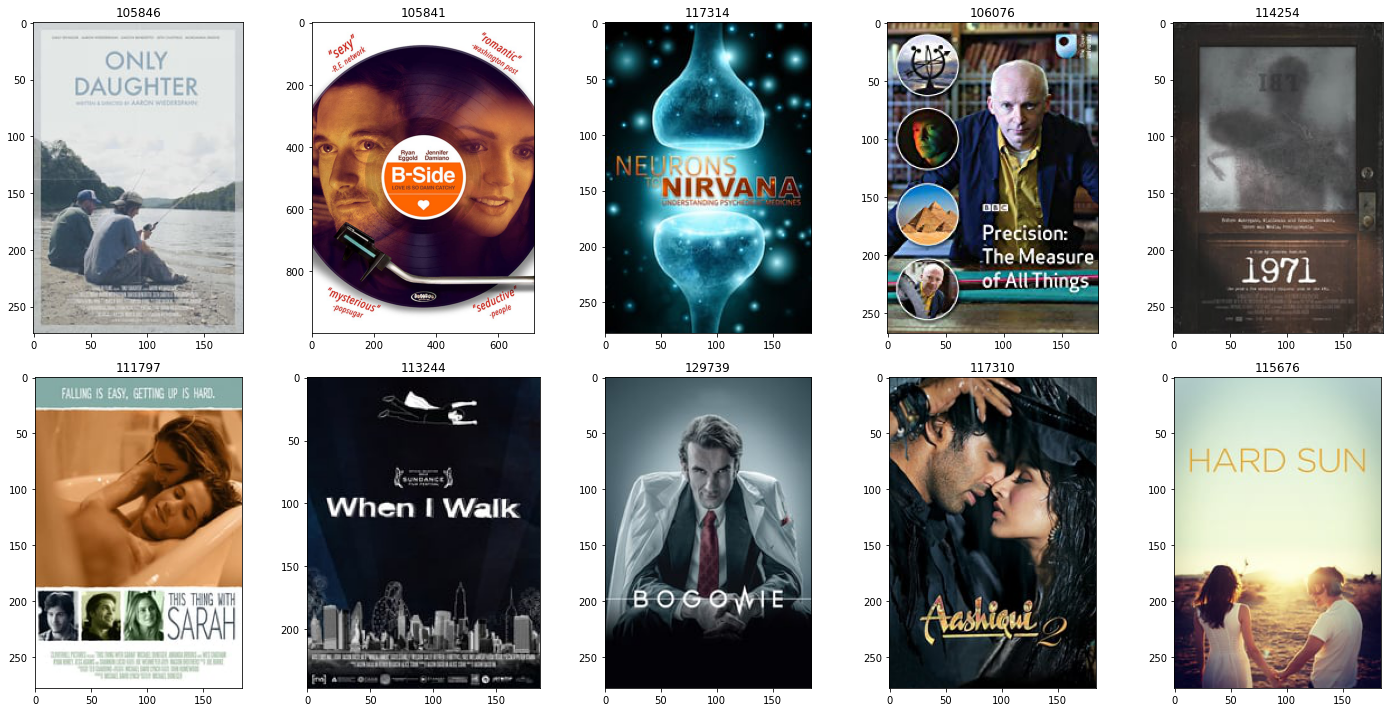

In [15]:
display_posters(recent_top10)